In [2]:
import os
from textblob import TextBlob
import pandas as pd
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [3]:
from ggplot import *
import seaborn as sns

In [4]:
# Set working Directory
os.chdir("/Users/ad/Desktop/Project 4")

In [5]:
# Load Text Data
#post = pd.read_csv("Text_Mining_Post.csv")
post = pd.read_csv("WomensClothingReviews.csv")

In [41]:
post.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
post['Review Text']= post['Review Text'].astype(str)

In [67]:
post.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
post.shape

In [5]:
post1 = post.iloc[:1000,4:5]

In [6]:
post1.head()

,Review Text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...


In [7]:
post1.shape

(1000, 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

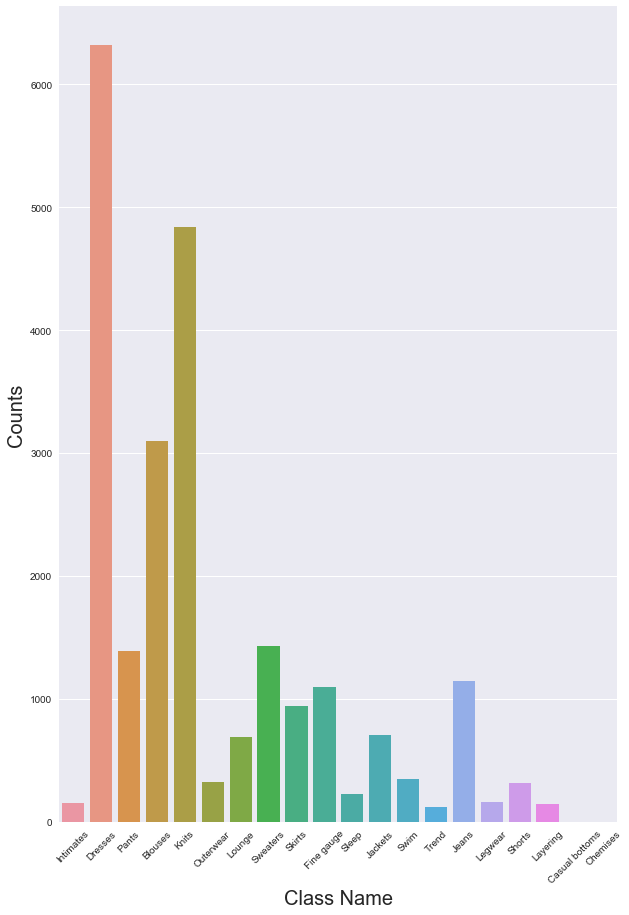

In [8]:
#Checking counts of Class name apparels
plt.figure(figsize = (10,15)),
sns.set(font_scale = 1),
sns.countplot(x = 'Class Name', data = post)
plt.xlabel ( 'Class Name' , fontsize = 20)
plt.ylabel ( 'Counts' , fontsize = 20)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Number of review per page')

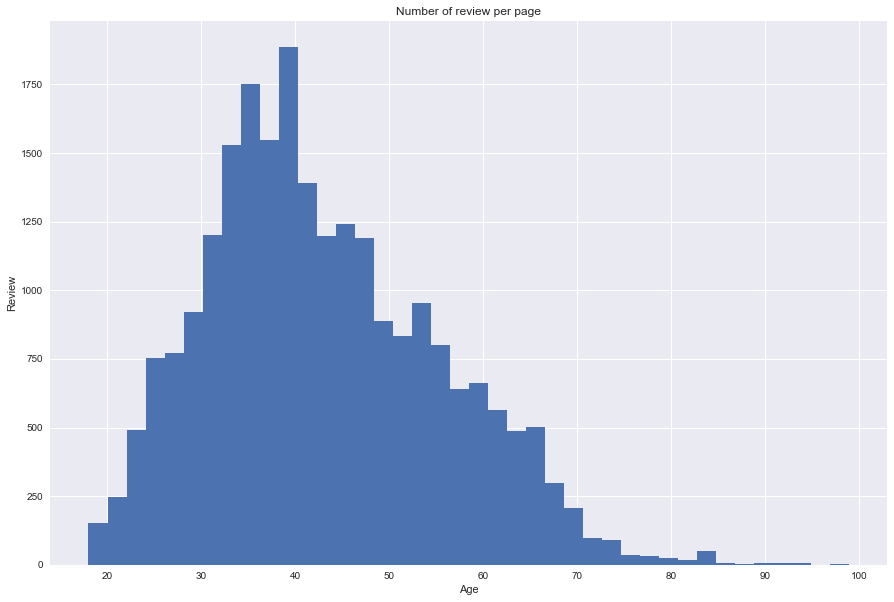

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
plt.hist(post['Age'],bins=40)
plt.xlabel("Age")
plt.ylabel("Review")
plt.title("Number of review per page")

Text(0.5, 1.0, 'Distribution of Recommended IND')

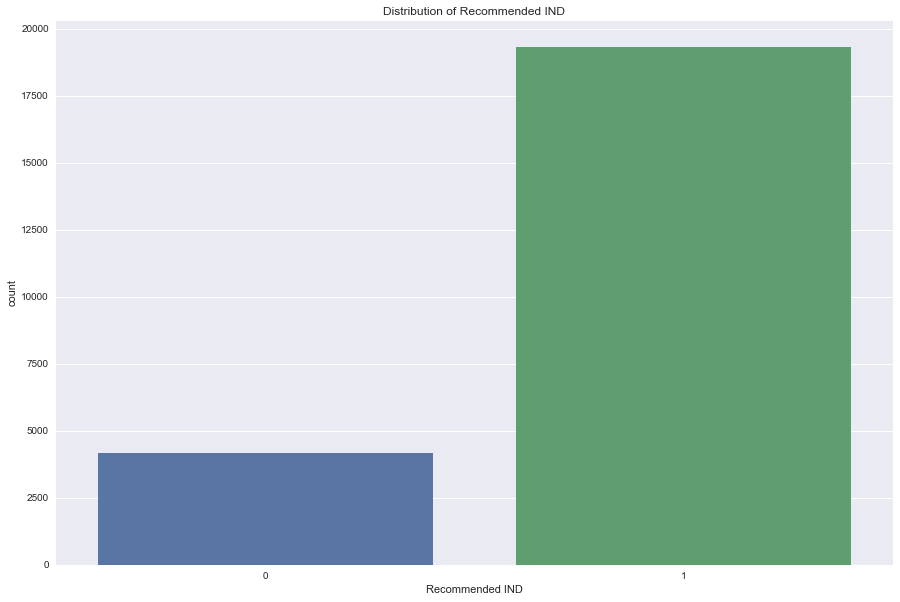

In [21]:
# Plot frequency distribution of Recommended IND
sns.countplot(x='Recommended IND',data=post)
plt.title("Distribution of Recommended IND")

In [ ]:
#nltk.download()

Text(0.5, 1.0, 'Distribution of Department Name')

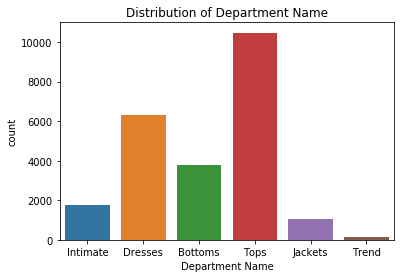

In [6]:
sns.countplot(x='Department Name',data=post)
plt.title("Distribution of Department Name")

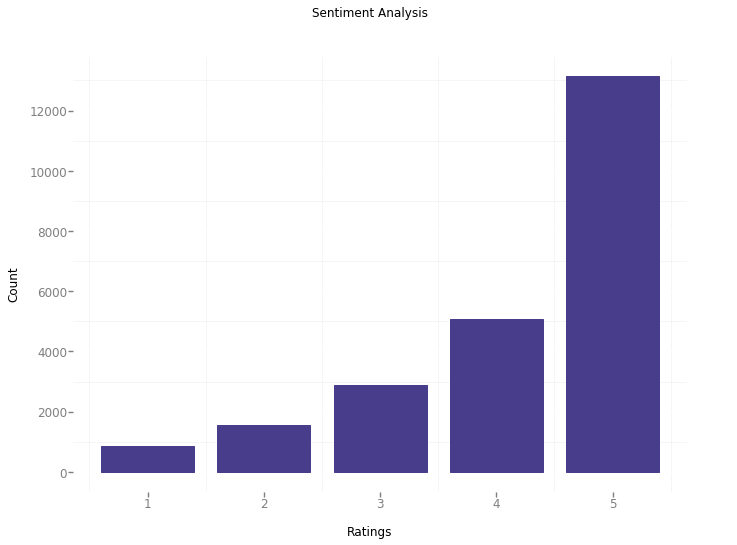

<ggplot: (7009741867)>

In [52]:
# Barplot for Month.of.absence
ggplot(post, aes(x = "Rating"))+\
geom_bar(fill= "DarkSlateBlue") +\
scale_color_brewer(type = 'diverging', palatte= 8) +\
xlab('Ratings') + ylab('Count') + ggtitle("Sentiment Analysis") + theme_bw()

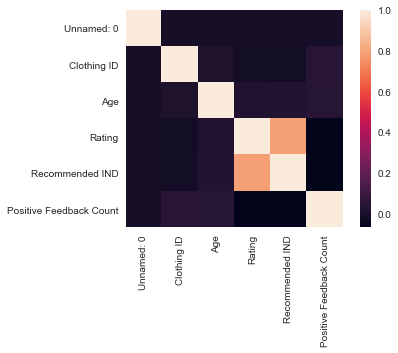

In [13]:
corrmat = post.corr()
sns.heatmap(corrmat,square=True);

In [8]:
# Extract stopwords
stop = set(stopwords.words("english"))

# Extract punctuations
punctuation = set(string.punctuation)

In [9]:
# Text pre-processing
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in punctuation)
    num_free = ''.join(i for i in punc_free if not i.isdigit())
    return num_free

post_corpus = [clean(post1.iloc[i,0]) for i in range(0, post1.shape[0])]

In [11]:
post1.iloc[1,0]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [ ]:
post1.shape

In [ ]:
post1.shape[0]

In [ ]:
post1.dtypes

In [ ]:
post_corpus[3]

In [12]:
tdm = textmining.TermDocumentMatrix()

for i in post_corpus:
    #print(i)
    tdm.add_doc(i)

In [ ]:
tdm.write_csv('TDM_DataFrame.csv')

In [ ]:
df = pd.read_csv('TDM_DataFrame.csv')

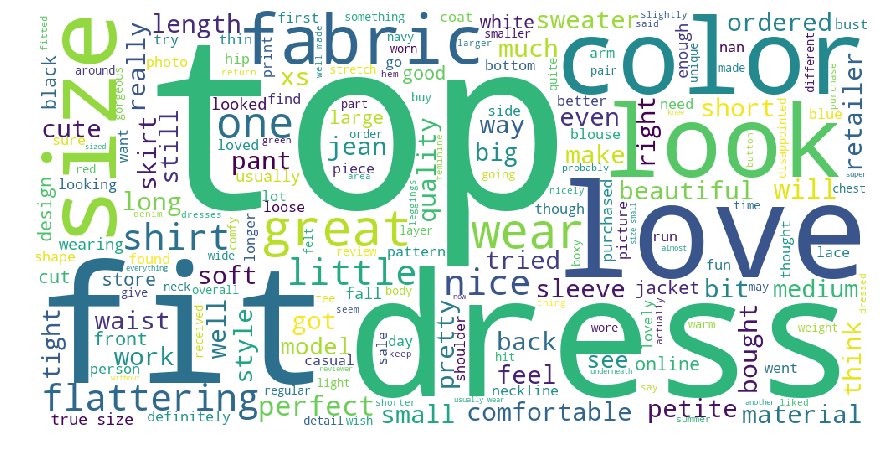

In [13]:
# Plot WordCloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords= STOPWORDS, background_color= 'white').generate(' '.join(post1['Review Text']))

plt.figure(figsize= (15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentiment Analysis

In [14]:
FinalResults = pd.DataFrame()

for i in range(0, post1.shape[0]):
    #print(i)
    blob = TextBlob(post1.iloc[i,0])
    
    temp = pd.DataFrame({'Comments': post1.iloc[i,0], 'Polarity': blob.sentiment.polarity}, index= [0])
    
    FinalResults = FinalResults.append(temp)

In [ ]:
FinalResults.head(20)

In [29]:
FinalResults_Vader = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, post1.shape[0]):
    print(i)
    snt = analyzer.polarity_scores(post1.iloc[i,0])
    
    temp = pd.DataFrame({'Comments': post1.iloc[i,0], 'Polarity': snt.items()}, index=[0])
    
    FinalResults_Vader = FinalResults_Vader.append(temp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
post1.shape[0]

1000

In [40]:
FinalResults_Vader.iloc[3,1]

dict_items([('neg', 0.226), ('neu', 0.34), ('pos', 0.434), ('compound', 0.5727)])